# Раздел 0. Импорт библиотек и загрузка данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from scipy import stats

In [2]:
group = pd.read_csv('C:/Users/Melod/Desktop/Финальная работа/Материалы для финальной работы/Материалы для итоговой работы/ABgroup.csv')
cheaters = pd.read_csv('C:/Users/Melod/Desktop/Финальная работа/Материалы для финальной работы/Материалы для итоговой работы/Cheaters.csv')
cash = pd.read_csv('C:/Users/Melod/Desktop/Финальная работа/Материалы для финальной работы/Материалы для итоговой работы/Cash.csv', parse_dates=['date'], dayfirst=True)
money = pd.read_csv('C:/Users/Melod/Desktop/Финальная работа/Материалы для финальной работы/Материалы для итоговой работы/Money.csv', parse_dates=['date'], dayfirst=True)
platforms = pd.read_csv('C:/Users/Melod/Desktop/Финальная работа/Материалы для финальной работы/Материалы для итоговой работы/Platforms.csv')

# Раздел 1. Цель проекта.

## Выяснить, стоит ли проводить акцию в дальнейшем. Если игроки, участвовавшие в акции, принесли больше денег, чем игроки, у которых акции не было, то стоит повторять акцию и при этом уже на всех игроках.

# Раздел 2. Анализ источников.

## Я выбрал python, Jupiter Notebook, т.к.  с точки зрения аналитических инструментов - Jupyter Notebook является наиболее оптимальным инструментом, поскольку он позволяет и работать с отдельными логическими фрагментами кода независимо, и выводить результаты их работы в процессе исследования, и дополнять эти результаты текстовыми комментариями в ячейках типа markdown.

# Раздел 3. Очистка данных.

## 1. Анализ известных читеров.
### Для очистки данных нам нужно проанализировать имеющихся читеров и найти закономерности в их действиях, чтобы в дальнейшем найти оставшихся в таблицах.

В отдельный датафрейм 'found_cheaters' выписываем 'user_id' известных читеров. 
Из таблицы 'cheaters' методом 'loc' находим значения '1'.

In [5]:
found_cheaters = cheaters.loc[cheaters['cheaters'] == 1]

Удаляем дубликаты, получаем user_id известных читеров. 

In [8]:
f_cheaters = found_cheaters.drop_duplicates()

Получаем 353 известных читеров.

In [9]:
print(f_cheaters['user_id'].count())

353


Создаем датафрейм из таблицы 'cash.csv', в котором посчитаем сумму трат игровой валюты по каждому user_id.

In [10]:
cash_sum = cash.groupby('user_id').sum()

C:\Users\Melod\AppData\Local\Temp\ipykernel_1852\886958755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cash_sum = cash.groupby('user_id').sum()


Также создаем датафрейм с суммой внесенных средств в игру по каждому user_id.

In [11]:
money_sum = money.groupby('user_id').sum()

C:\Users\Melod\AppData\Local\Temp\ipykernel_1852\2480359821.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  money_sum = money.groupby('user_id').sum()


Теперь соединяем известных читеров, их траты игровой валюты и внесенные средства в датафрейм 'main_df'.

In [12]:
main_df = f_cheaters.merge(cash_sum, on='user_id')

In [13]:
main_df = main_df.merge(money_sum, on='user_id')

Построим точечную диаграмму.

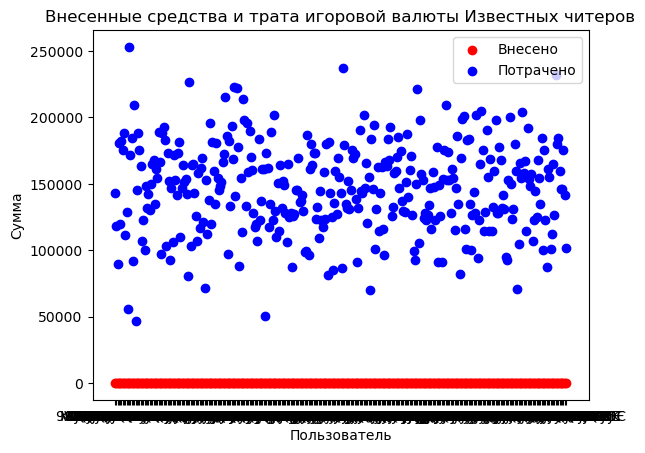

In [14]:
x_data = main_df['user_id']
y_data_in = main_df['money']
y_data_out = main_df['cash']

plt.scatter(x_data, y_data_in, color='r', label='Внесено')
plt.scatter(x_data, y_data_out, color='b', label='Потрачено')

plt.xlabel('Пользователь')
plt.ylabel('Сумма')
plt.title('Внесенные средства и трата игоровой валюты Известных читеров')
plt.legend()

plt.show()

На диаграмме видно явную закономерность: Читеры не вносят никакой суммы денег, но траты игровой валюты высоки.

Также выведем краткую информацию о трате игровой валюты методом 'describe'.

In [15]:
main_df.cash.describe()

count       353.000000
mean     146807.932011
std       33800.925081
min       46700.000000
25%      125100.000000
50%      147200.000000
75%      169700.000000
max      253150.000000
Name: cash, dtype: float64

## Вывод: 
>## 1.Читеры не тратят реальные деньги.
>## 2.Тратят много игровой валюты. Минимально 46700 единиц.

## 2. Поиск неизвестных читеров.

### Из предыдущего вывода мы увидели, что траты реальных денег читеров равны нулю. Следовательно из оставшихся игроков выделим в отдельный датафрейм тех, кто также не внес деньги в игру и проанализируем полученные данные.

В отдельный датафрейм 'clean_df_test' заносим юзеров, которые не были определены, тоесть значения из таблицы 'cheaters' равные '0'. И сразу удаляем дубликаты. Полученные данные записываем в датафрейм 'clean_df'.

In [16]:
clean_df_test = cheaters.loc[cheaters['cheaters'] == 0]
clean_df = clean_df_test.drop_duplicates()

Добавляем суммы их трат игровой валюты и внесенных денег в игру. Получаем датафрейм 'clean_main'.

In [17]:
clean_main = clean_df.merge(cash_sum, on='user_id')
clean_main = clean_main.merge(money_sum, on='user_id')

Посчитаем сколько юзеров не вносили деньги в игру. И получаем кол-во 571.

In [18]:
print(clean_main['money'].value_counts().loc[0])

571


Вынесем 571 юзеров в отдельный датафрейм.

In [19]:
find_df = clean_main.loc[clean_main['money'] == 0]

Построим точечную диаграмму, визуализируем полученные данные.

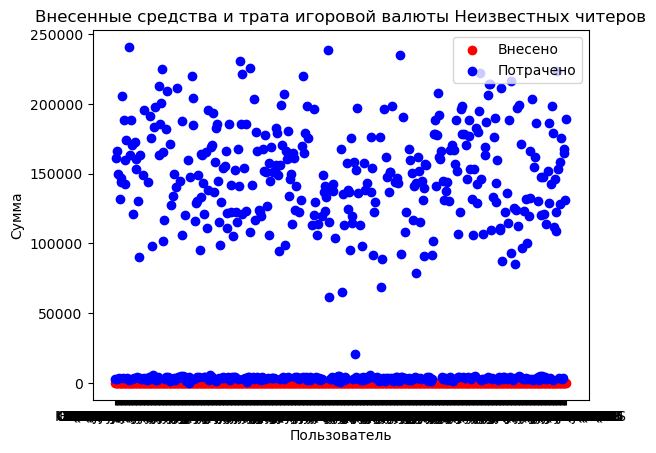

In [20]:
x_data = find_df['user_id']
y_data_in = find_df['money']
y_data_out = find_df['cash']

plt.scatter(x_data, y_data_in, color='r', label='Внесено')
plt.scatter(x_data, y_data_out, color='b', label='Потрачено')

plt.xlabel('Пользователь')
plt.ylabel('Сумма')
plt.title('Внесенные средства и трата игоровой валюты Неизвестных читеров')
plt.legend()

plt.show()

Видим, что на гистограмме видно две группы людей, кто тратит игровой валюты выше 50 000, и кто тратит значительно меньше. И если брать для сравнения диаграмму известных читеров, то читеры те , кто потратил больше 50 000 игровой валюты. 

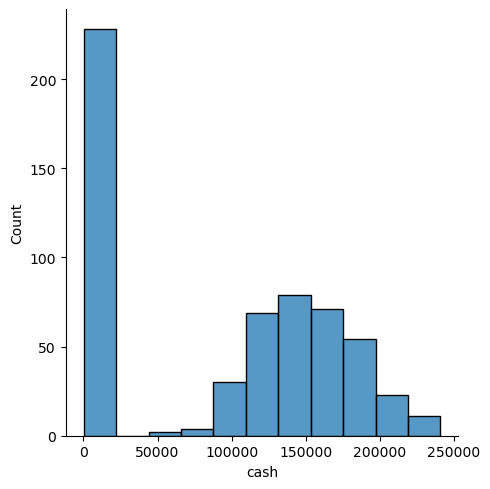

In [21]:
sns.displot(find_df['cash'])

### Вывод: 
>### Получаем 2 группы людей, в первой те кто при нулевых вложениях в игру тратят игровой валюты выше 50 000, а во второй группе траты игровой валюты значительно ниже. Следовательно из данных что мы имеем, предполагаю что читеры находятся в первой группе и эти данные должны быть очищенны перед расчетами прибыли.

## 3. Очистка данных.

### Для очистки данных от читеров используем предыдущий полученный вывод. Отфильтруем данные по двум найденным условиям:
### 1. Читер не вносит деньги в игру.
### 2. Тратит больше 50 000 игровой валюты.

Т.к. мы в подразделе '2. Поиск неизвестных читеров.' уже делали эти действия (Из таблицы 'cheaters' выносим всех юзеров с показателем '0'. Убираем дубликаты, добавляем в него все вложения и расходы из таблицы 'cash' и 'money'), используем готовый датафрейм 'clean_main'. Приступаем к фильтрации.
Из датафрейма 'clean_main' берем пользователей, траты которых меньше 50 000 единиц. Для этого используем метод 'loc'.
Получаем суммы трат внутриигровой валюты и вложения по каждому user_id, без читеров.

In [22]:
cleared_df = clean_main.loc[clean_main['cash'] < 50000]

Также находим user_id найденных читеров.

In [23]:
cheaters_id = clean_main.loc[clean_main['cash'] > 50000]

Получаем 343 читера, найденные мной.

In [24]:
print(cheaters_id.user_id.count())

343


In [25]:
cheaters_id

,user_id,cheaters,cash,money
1474,U9N50N-L8C4MA,0,161600,0.0
1575,XKTIX5-M7HG8T,0,166000,0.0
5637,66E4WV-I63558,0,150100,0.0
6159,KZMWZ9-M61WFH,0,132050,0.0
7365,ZQNX2R-TGBYZ0,0,147200,0.0
...,...,...,...,...
1068170,OPW83L-LM3N4F,0,175800,0.0
1074380,UAPIZ8-A5GI56,0,165000,0.0
1077436,CVT8AG-IDF5PH,0,167400,0.0
1078051,AGEH12-LOH02K,0,131400,0.0


Для дальнейшего анализа по группам, платформам и дням нам нужно в исходных датафреймах (cash, money, group, platforms) не использовать строки, содержащие user_id всех читеров.
Для этого из датафрейма 'clean_df_test', где были выбраны все действия не читерами(с параметром 0 в исходной таблице 'cheaters'), мы удаляем 343 'user_id' найденных мной.

In [26]:
final_df_test = clean_df_test.loc[~((clean_df_test.user_id.isin(cheaters_id['user_id']))),:]

Теперь добавляем столбцы 'cash', 'money', 'group', 'platform' методом 'merge'. Удаляем дубликаты.

In [27]:
final_df = final_df_test.merge(cash, on='user_id')
final_df = final_df.drop_duplicates()

In [28]:
final_df = final_df.merge(group, on='user_id')
final_df = final_df.drop_duplicates()

In [29]:
final_df = final_df.merge(platforms, on='user_id')
final_df = final_df.drop_duplicates()

In [30]:
final_df = final_df.merge(money, on=['user_id', 'date'])
final_df = final_df.drop_duplicates()

Удаляем более не нужный столбец 'cheaters'.

In [31]:
final_df = final_df.drop('cheaters', axis=1)

## Вывод:
>## В итоге получаем общий датафрейм 'final_df', со всеми данными без читеров.

In [32]:
final_df

,user_id,date,cash,group,platform,money
0,TWLWB9-L19SYJ,2021-07-10,200,test,PS4,0.00
1,TWLWB9-L19SYJ,2021-07-11,1050,test,PS4,0.99
2,TWLWB9-L19SYJ,2021-07-16,1100,test,PS4,1.99
3,TWLWB9-L19SYJ,2021-07-13,150,test,PS4,0.99
4,TWLWB9-L19SYJ,2021-07-17,2650,test,PS4,1.99
...,...,...,...,...,...,...
8634427,28DENA-HWECBB,2021-07-13,1150,test,PC,0.99
8634428,28DENA-HWECBB,2021-07-17,0,test,PC,0.00
8634429,28DENA-HWECBB,2021-07-16,0,test,PC,0.99
8634430,28DENA-HWECBB,2021-07-15,1250,test,PC,0.99


# Раздел 4. Использование статистических методов.

### Для того чтобы ответить на вопрос цели моей работы, можно использовать доверительные интервалы. Они позволяют оценить, насколько вероятно, что разница в средних значениях двух групп (те, кто участвовал в акции и те, кто не участвовал) является случайной.

### Для этого нужно выполнить следующие шаги:

### 1.Разделить датафрейм на две группы общие группы ('test_group' и 'control_group') и затем на группы по каждой платформе.
### 2.Посчитать средние значения для всех групп.
### 3.Построить доверительные интервалы для обеих групп с уровнем значимости 95%.
### 4.Сравнить доверительные интервалы и проверить, пересекаются ли они. 
Если доверительные интервалы пересекаются, то разница в средних значениях может быть случайной. Если же доверительные интервалы не пересекаются, то разница в средних значениях является значимой и не может быть объяснена случайностью.

## 1. Разделим датафрейм на группы.

In [33]:
test_group = final_df[(final_df['group'] == 'test')]
control_group = final_df[(final_df['group'] == 'control')]
xbox_test = test_group[(test_group['platform'] == 'XBox')]
xbox_control = control_group[(control_group['platform'] == 'XBox')]
ps4_test = test_group[(test_group['platform'] == 'PS4')]
ps4_control = control_group[(control_group['platform'] == 'PS4')]
pc_test = test_group[(test_group['platform'] == 'PC')]
pc_control = control_group[(control_group['platform'] == 'PC')]

Создаем функцию для подсчета доверительного интервала.

In [34]:
def my_norm_confidence(df, column, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval
    

Для начала сравним среднее значение внесенных средств двух групп на всех платформах. 

Подставим внесенные средства 'money' и траты игровой валюты 'cash' к участникам каждой из групп по платформе.

In [35]:
print('Внесенные средства тестовой группы "money":', test_group['money'].mean(), "cash:", test_group['cash'].mean())

Внесенные средства тестовой группы "money": 0.7702844503738083 cash: 778.6995398767318


In [36]:
print('Внесенные средства контрольной группы "money":', control_group['money'].mean(), "cash", control_group['cash'].mean())

Внесенные средства контрольной группы "money": 0.7286834318841762 cash 725.0916217277293


### Вывод: Тестовая группа в среднем потратила больше 'money' и 'cash'. Можно предположить, что акция повысила траты игроков.

## 2. Теперь проанализируем, траты по каждой платформе. 

In [37]:
print('Внесенные средства тестовой группы на XBOX "money":', xbox_test['money'].mean(), "cash:", xbox_test['cash'].mean())

Внесенные средства тестовой группы на XBOX "money": 0.7665957409885766 cash: 772.0503590130888


In [38]:
print('Внесенные средства контрольной группы на XBOX "money":', xbox_control['money'].mean(), "cash:", xbox_control['cash'].mean())

Внесенные средства контрольной группы на XBOX "money": 0.7629401097226459 cash: 766.4741902413344


In [39]:
print('Разница средних вложений money:',  xbox_test['money'].mean() - xbox_control['money'].mean(), 'и cash:', xbox_test['cash'].mean() - xbox_control['cash'].mean())

Разница средних вложений money: 0.0036556312659307144 и cash: 5.576168771754396


### На платформе XBOX существенной разницы в средних вложениях не видно.

In [40]:
print('Внесенные средства тестовой группы на PS4 "money":', ps4_test['money'].mean(), "cash:", ps4_test['cash'].mean())

Внесенные средства тестовой группы на PS4 "money": 0.7606103238302264 cash: 766.3116587241869


In [41]:
print('Внесенные средства контрольной группы на PS4 "money":', ps4_control['money'].mean(), "cash:", ps4_control['cash'].mean())

Внесенные средства контрольной группы на PS4 "money": 0.7172058672220865 cash: 710.2420204778537


In [42]:
print('Разница средних вложений money:',  ps4_test['money'].mean() - ps4_control['money'].mean(), 'и cash:', ps4_test['cash'].mean() - ps4_control['cash'].mean())

Разница средних вложений money: 0.04340445660813996 и cash: 56.069638246333284


### На платформе PS4 разница гораздо заметнее чем на XBOX.

In [43]:
print('Внесенные средства тестовой группы на PC "money":', pc_test['money'].mean(), "cash:", pc_test['cash'].mean())

Внесенные средства тестовой группы на PC "money": 0.7836307696585477 cash: 797.7182043154265


In [44]:
print('Внесенные средства контрольной группы на PC "money":', pc_control['money'].mean(), "cash:", pc_control['cash'].mean())

Внесенные средства контрольной группы на PC "money": 0.7057712412300472 cash: 698.3982838432564


In [45]:
print('Разница средних вложений money:',  pc_test['money'].mean() - pc_control['money'].mean(), 'и cash:', pc_test['cash'].mean() - pc_control['cash'].mean())

Разница средних вложений money: 0.07785952842850052 и cash: 99.31992047217011


### На PC акция повлияла значительнее больше на среднее money и cash чем на других платформах.

### Выведем разницу между двух групп по платформам:

Посчитаем среднюю прибыль по игрокам.

In [46]:
print('Разница средних вложений money на XBOX:',  xbox_test['money'].mean() - xbox_control['money'].mean(), 'и cash:', xbox_test['cash'].mean() - xbox_control['cash'].mean())
print('Разница средних вложений money на PS4:',  ps4_test['money'].mean() - ps4_control['money'].mean(), 'и cash:', ps4_test['cash'].mean() - ps4_control['cash'].mean())
print('Разница средних вложений money на PC:',  pc_test['money'].mean() - pc_control['money'].mean(), 'и cash:', pc_test['cash'].mean() - pc_control['cash'].mean())

Разница средних вложений money на XBOX: 0.0036556312659307144 и cash: 5.576168771754396
Разница средних вложений money на PS4: 0.04340445660813996 и cash: 56.069638246333284
Разница средних вложений money на PC: 0.07785952842850052 и cash: 99.31992047217011


#### Вывод:
>#### Мы сравнили средние показатели по 2-м группам, затем по каждой платформе.
>#### В результате увидели, что акция увеличила средние траты игрока реальных и виртуальных денег. Дополнительно выяснили, что акция незначительно повлияла на показатели для платформы XBOX, хотя они всё равно положительные, а вот на платформе PC результаты больше всего ощутимы.

## 3. Построение доверительных интервалов.

Для того, чтобы убедится, что мои предыдущие выводы верны, нужно построить гистограммы с границами доверительных интервалов по тестовым и контрольным группам на каждой платформе при доверительной значимости 95%.
    Создадим функцию для подсчета границ интервалов. Используем библиотеку scipy.stats.

In [47]:
def my_norm_confidence(df, column, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

Функция принимает название датафрейма и его столбец.

Теперь найдем сумму вложение по каждому игроку. Для этого создадим отдельные датафреймы и сгрупируем их по столбцу 'user_id', после чего посчитаем сумму.

In [48]:
test_sum_user = test_group.groupby('user_id').sum(numeric_only=True)
control_sum_user = control_group.groupby('user_id').sum(numeric_only=True)
test_ps4_sum_user = ps4_test.groupby('user_id').sum(numeric_only=True)
test_PC_sum_user = pc_test.groupby('user_id').sum(numeric_only=True)
test_xbox_sum_user = xbox_test.groupby('user_id').sum(numeric_only=True)
control_ps4_sum_user = ps4_control.groupby('user_id').sum(numeric_only=True)
control_PC_sum_user = pc_control.groupby('user_id').sum(numeric_only=True)
control_xbox_sum_user = xbox_control.groupby('user_id').sum(numeric_only=True)

Теперь найдем доверительные интервалы по показателям 'money' и 'cash' для каждой группы, подставив новые созданные датафреймы в функцию 'my_norm_confidence'.

In [49]:
test_ps4_sum_user_conf = my_norm_confidence(df=test_ps4_sum_user, column='money')
control_ps4_sum_user_conf = my_norm_confidence(df=control_ps4_sum_user, column='money')
test_PC_sum_user_conf = my_norm_confidence(df=test_PC_sum_user, column='money')
control_PC_sum_user_conf =  my_norm_confidence(df=control_PC_sum_user, column='money')
test_xbox_sum_user_conf = my_norm_confidence(df=test_xbox_sum_user, column='money')
control_xbox_sum_user_conf = my_norm_confidence(df=control_xbox_sum_user, column='money')
test_sum_user_cash_conf = my_norm_confidence(df=test_sum_user, column='cash')
control_sum_user_cash_conf = my_norm_confidence(df=control_sum_user, column='cash')
test_sum_user_money_conf = my_norm_confidence(df=test_sum_user, column='money')
control_sum_user_money_conf = my_norm_confidence(df=control_sum_user, column='money')

Для начала посмотрим на общие гистограммы по двум тестовой и контрольной группам. Для этого воспользуемся библиотеками seaborn и matplotlib.

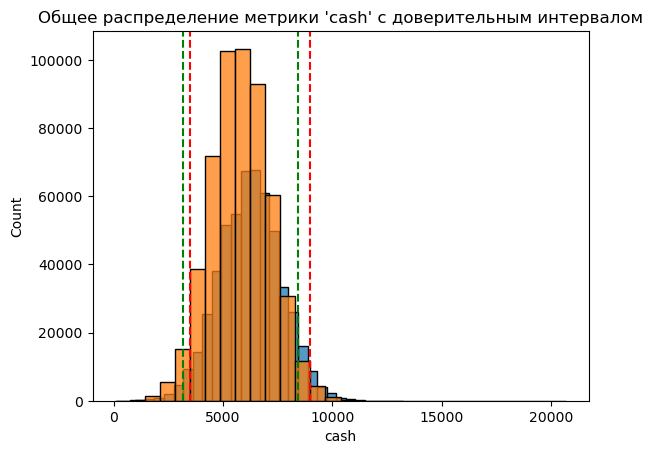

In [50]:
sns.histplot(test_sum_user['cash'], bins=30)
sns.histplot(control_sum_user['cash'], bins=30)
plt.axvline(x=test_sum_user_cash_conf[0], color='red', linestyle='--')
plt.axvline(x=test_sum_user_cash_conf[1], color='red', linestyle='--')
plt.axvline(x=control_sum_user_cash_conf[0], color='green', linestyle='--')
plt.axvline(x=control_sum_user_cash_conf[1], color='green', linestyle='--')
plt.title("Общее распределение метрики 'cash' с доверительным интервалом")
plt.show()

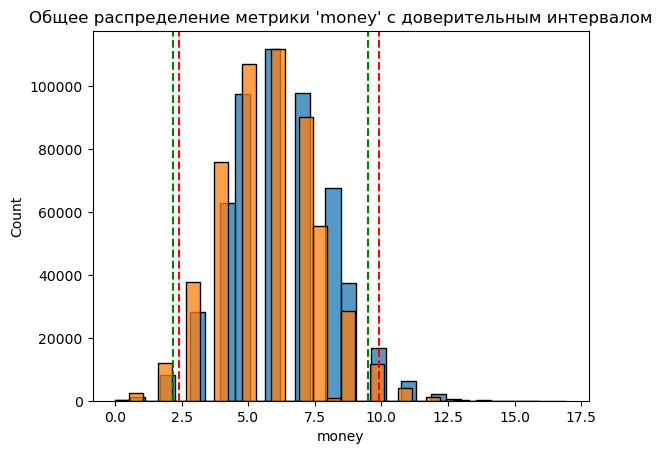

In [51]:
sns.histplot(test_sum_user['money'], bins=30)
sns.histplot(control_sum_user['money'], bins=30)
plt.axvline(x=test_sum_user_money_conf[0], color='red', linestyle='--')
plt.axvline(x=test_sum_user_money_conf[1], color='red', linestyle='--')
plt.axvline(x=control_sum_user_money_conf[0], color='green', linestyle='--')
plt.axvline(x=control_sum_user_money_conf[1], color='green', linestyle='--')
plt.title("Общее распределение метрики 'money' с доверительным интервалом")
plt.show()

Видим практически полное пересечение доверительных интервалов. Для более детального изучения проверим пересечение интервалов для каждой платформы.

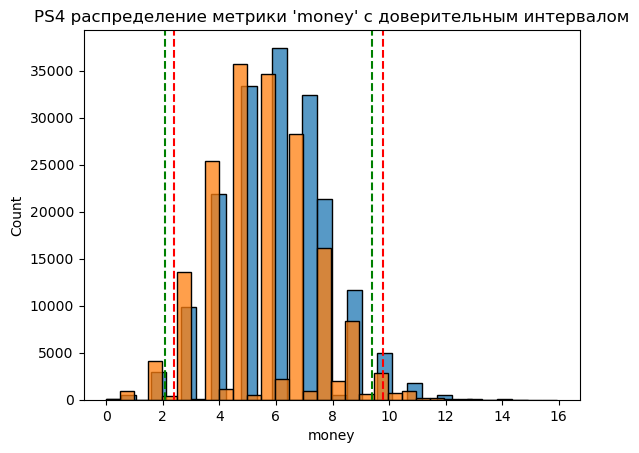

In [52]:
sns.histplot(test_ps4_sum_user['money'], bins=30)
sns.histplot(control_ps4_sum_user['money'], bins=30)
plt.axvline(x=test_ps4_sum_user_conf[0], color='red', linestyle='--')
plt.axvline(x=test_ps4_sum_user_conf[1], color='red', linestyle='--')
plt.axvline(x=control_ps4_sum_user_conf[0], color='green', linestyle='--')
plt.axvline(x=control_ps4_sum_user_conf[1], color='green', linestyle='--')
plt.title("PS4 распределение метрики 'money' с доверительным интервалом")
plt.show()

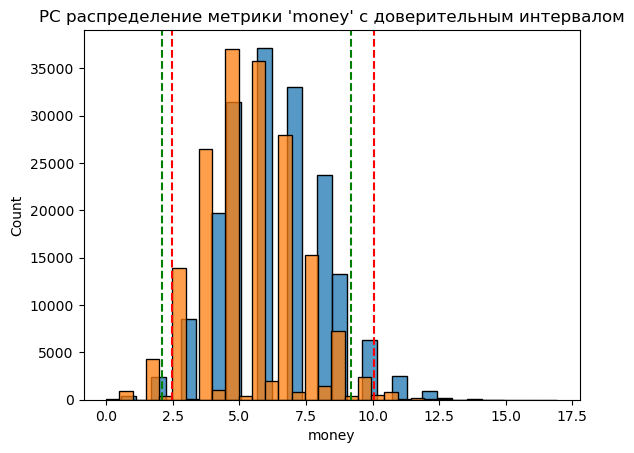

In [53]:
sns.histplot(test_PC_sum_user['money'], bins=30)
sns.histplot(control_PC_sum_user['money'], bins=30)
plt.axvline(x=test_PC_sum_user_conf[0], color='red', linestyle='--')
plt.axvline(x=test_PC_sum_user_conf[1], color='red', linestyle='--')
plt.axvline(x=control_PC_sum_user_conf[0], color='green', linestyle='--')
plt.axvline(x=control_PC_sum_user_conf[1], color='green', linestyle='--')
plt.title("PC распределение метрики 'money' с доверительным интервалом")
plt.show()

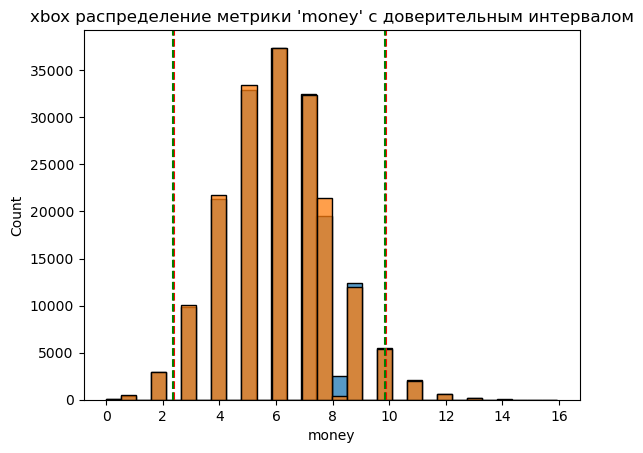

In [54]:
sns.histplot(test_xbox_sum_user['money'], bins=30)
sns.histplot(control_xbox_sum_user['money'], bins=30)
plt.axvline(x=test_xbox_sum_user_conf[0], color='red', linestyle='--')
plt.axvline(x=test_xbox_sum_user_conf[1], color='red', linestyle='--')
plt.axvline(x=control_xbox_sum_user_conf[0], color='green', linestyle='--')
plt.axvline(x=control_xbox_sum_user_conf[1], color='green', linestyle='--')
plt.title("xbox распределение метрики 'money' с доверительным интервалом")
plt.show()

# Вывод:
## На основании полученной информации можно сделать следующие выводы для дипломной работы:

>## В игре было проведено A/B тестирование, в результате которого были получены данные о средних показателях тестовой и контрольной групп.
>## По результатам тестирования было обнаружено, что средние показатели тестовой группы выше, чем в контрольной группе, как по общей сумме трат игровой валюты, так и по общей сумме вложений.
>## Однако, после построения доверительных интервалов было обнаружено, что интервалы практически полностью пересекаются.
>## Это говорит о том, что обе группы пользователей (и контрольная, и тестовая) - из одной генеральной совокупности, что свидетельствует о том, что при доверительной вероятности в 95% результаты тестирования могут быть случайными и не отражают реальных различий между тестовой и контрольной группами.
>## На основании полученной информации можно сделать вывод, что акция не принесла значительной пользы, чтобы ее в дальнейшем проводить. 